In [2]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import pandas as pd
import scipy.stats as stats

import pickle
import json

In [3]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

## Hubble constant and $\Omega_{\Lambda}$

In [4]:
with open('data/400_Hubble_Omega_l_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)

In [5]:
df

,Omega_l,Omega_m,Hubble,Ratio
0,0.3,0.262069,0.000000,735054.746786
1,0.3,0.262069,0.250627,735054.746786
2,0.3,0.262069,0.501253,571877.582927
3,0.3,0.262069,0.751880,485907.099128
4,0.3,0.262069,1.002506,429154.721394
...,...,...,...,...
159995,1.5,0.262069,98.997494,7645.192757
159996,1.5,0.262069,99.248120,7709.787698
159997,1.5,0.262069,99.498747,7774.490867
159998,1.5,0.262069,99.749373,7839.301039


Text(0, 0.5, 'H (km/s Mpc)')

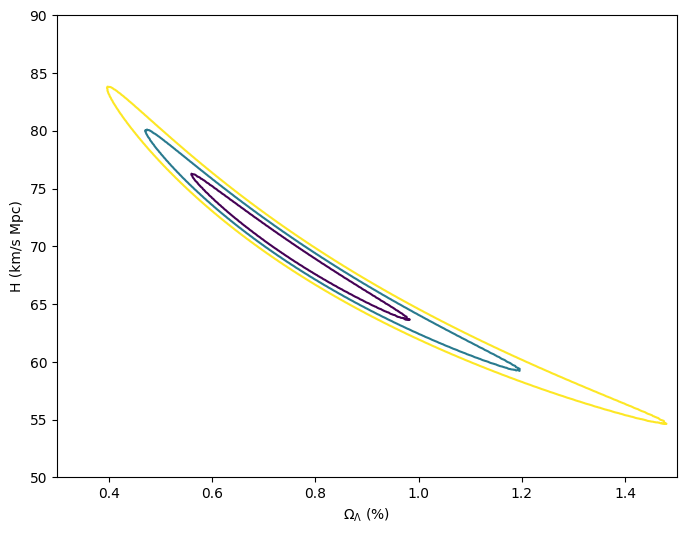

In [294]:
plt.tricontour(df.Omega_l, df.Hubble, df.Ratio, levels = [lambda1, lambda2, lambda3])

plt.ylim([50, 90])

plt.xlabel('$\Omega_{\Lambda}$ (%)')
plt.ylabel('H (km/s Mpc)')

## Hubble constant and $\Omega_{m}$

In [277]:
with open('data/400_Omega_m_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)

Text(0, 0.5, 'H (km/s Mpc)')

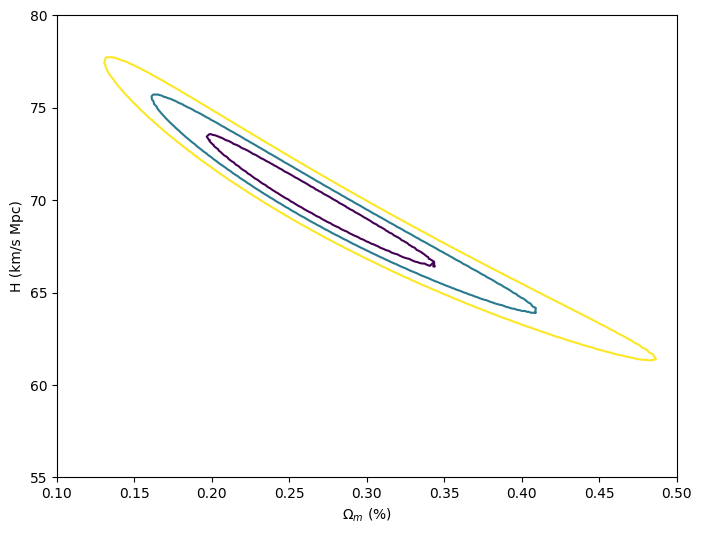

In [278]:
plt.tricontour(df.Omega_m, df.Hubble, df.Ratio, levels = [lambda1, lambda2, lambda3])

plt.ylim([55, 80])

plt.xlim([0.1, 0.5])

plt.xlabel('$\Omega_{m}$ (%)')
plt.ylabel('H (km/s Mpc)')

##  $\Omega_m$ and $\Omega_{\Lambda}$

In [298]:
with open('data/400_Omega_m_Omega_l_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

Text(0, 0.5, '$\\Omega_{\\Lambda}$ (%)')

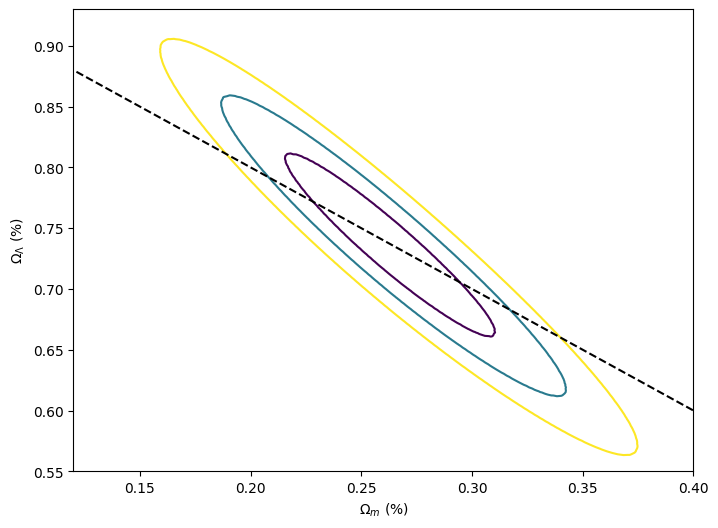

In [301]:
plt.tricontour(df.Omega_m, df.Omega_l, df.Ratio, levels = [lambda1, lambda2, lambda3])
plt.plot(np.linspace(0,1,100), -np.linspace(0,1,100)+1, linestyle = 'dashed', color='k')

plt.ylim([0.55, 0.93])
plt.xlim([0.12, 0.4])

plt.xlabel('$\Omega_{m}$ (%)')
plt.ylabel('$\Omega_{\Lambda}$ (%)')